<a href="https://colab.research.google.com/github/rajesh-coventry/Foundational-Neural-Network-Perceptron-PyTorch/blob/master/02_Single_Layer_Perceptron_in_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Single Layer Perceptron in PyTorch:**

The `Perceptron` is one of the simplest artificial neural network architectures, introduced by `Frank Rosenblatt` in 1957. It is primarily used for `binary classification`.

At that time, traditional methods like `Statistical Machine Learning` and `Conventional Programming` were commonly used for predictions. Despite being one of the simplest forms of artificial neural networks, the `Perceptron model` proved to be highly effective in solving specific classification problems, laying the groundwork for advancements in AI and machine learning.

## **What is Perceptron?**

`Perceptron` is a type of neural network that performs `binary classification` that maps input features to an output decision, usually classifying data into one of `two categories`, such as `0 or 1`.

`Perceptron` consists of a single layer of input nodes that are fully connected to a layer of output nodes. It is particularly good at learning linearly separable patterns. It utilizes a variation of `artificial neurons` called `Threshold Logic Units` $(TLU)$, which were first introduced by `McCulloch` and `Walter Pitts` in the 1940s. This foundational model has played a crucial role in the development of more advanced neural networks and machine learning algorithms.

## **Types of Perceptron:**

> - **`Single-Layer Perceptron`** is a type of perceptron that is limited to `learning linearly separable patterns`. It is effective for tasks where the data can be divided into distinct categories through a straight line. While powerful in its simplicity, it struggles with more complex problems where the relationship between inputs and outputs is `non-linear`.

> - **`Multi-Layer Perceptron`** possess enhanced processing capabilities as they consist of two or more layers, adept at handling more complex patterns and relationships within the data.

## **Basic Components of Perceptron:**

A Perceptron is composed of key components that work together to process information and make predictions.

1. **`Input Features:`**   
The perceptron takes multiple input features, each representing a characteristic of the input data.

2. **`Weights:`**   
Each input feature is assigned a weight that determines its influence on the output. These weights are adjusted during training to find the optimal values.

3. **`Summation Function:`**   
The perceptron calculates the weighted sum of its inputs, combining them with their respective weights.

4. **`Activation Function:`**  
The weighted sum is passed through the Heaviside step function, comparing it to a threshold to produce a binary output (0 or 1).

5. **`Output:`**   
The final output is determined by the activation function, often used for binary classification tasks.


6. **`Bias:`**  
The bias term helps the perceptron make adjustments independent of the input, improving its flexibility in learning.

7. **`Learning Algorithm:`**  
The perceptron adjusts its weights and bias using a learning algorithm, such as the Perceptron Learning Rule, to minimize prediction errors.

These components enable the `perceptron` to learn from data and make predictions. While a single perceptron can handle simple binary classification, complex tasks require multiple perceptrons organized into layers, forming a neural network.

## **How does Perceptron work?**

A `weight` is assigned to each input node of a perceptron, indicating the importance of that input in determining the output. The Perceptron’s output is calculated as a `weighted sum` of the inputs, which is then passed through an `activation function` to decide whether the Perceptron will fire.

**The weighted sum is computed as:**

> $( z = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n = X^T W $\)

The `step function` compares this weighted sum to a `threshold`. If the input is larger than the threshold value, the output is 1; otherwise, it's 0. This is the most common activation function used in `Perceptrons` are represented by the Heaviside step function:


h(z) =
\begin{cases}
0 & \text{if } z < \text{Threshold} \\
1 & \text{if } z \geq \text{Threshold}
\end{cases}


A perceptron consists of a single layer of `Threshold Logic Units` $(TLU)$, with each $TLU$ fully connected to all input nodes.

> ![](https://media.geeksforgeeks.org/wp-content/uploads/20230426162726/Perceptron-1.webp)

In a `fully connected layer`, also known as a `dense layer`, all neurons in one layer are connected to every neuron in the previous layer.

The output of the fully connected layer is computed as:

> $( f_{W,b}(X) = h(XW + b) $\)

where
X is the input,
W is the weight for each inputs neurons and
b is the bias and
h is the step function.

During training, the Perceptron's weights are adjusted to minimize the difference between the predicted output and the actual output. This is achieved using supervised learning algorithms like the delta rule or the Perceptron learning rule.

The weight update formula is:

\[$
w_{i,j} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
$\]

Where:

- \( $w_{i,j} $\) is the weight between the \($ i $\)-th input and \($ j $\)-th output neuron.

- \( $x_i $\) is the \($ i $\)-th input value.

- \( $y_j $\) is the actual value.

- \( $\hat{y}_j $\) is the predicted value.

- \( $\eta $\) is the learning rate, controlling how much the weights are adjusted.

This process enables the perceptron to learn from data and improve its prediction accuracy over time.

### **`Example:` Perceptron in Action:**

Let’s take a simple example of classifying whether a given fruit is an `apple or not` based on two inputs:
  - its weight (in grams) and   
  - its color (on a scale of 0 to 1, where 1 means red).
  
The `perceptron` receives these inputs, multiplies them by their `weights`, adds a `bias`, and applies the `activation function` to decide whether the fruit is an apple or not.

  - `Input 1` (Weight): 150 grams
  - `Input 2` (Color): 0.9 (since the fruit is mostly red)
  - `Weights`: [0.5, 1.0]
  - `Bias`: 1.5

The perceptron’s weighted sum would be:
  > $
(150 \times 0.5) + (0.9 \times 1.0) + 1.5 = 76.4
$

Let’s assume the activation function uses a threshold of 75. Since `76.4 > 75`, the perceptron classifies the fruit as an apple (`output = 1`).

## **Building and Training Single Layer Perceptron Model:**

For building the `perceptron model` we are going to implement following steps

### **`Step 1:` Initialize the weight and learning rate:**

We consider the `weight values` for the number of inputs + 1 (with the additional +1 accounting for the bias term). This ensures that both the inputs and bias are included during training.

In [ ]:
class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.01):
        # Initialize the weights (num_inputs + 1 for bias)
        self.weights = np.random.rand(num_inputs + 1)  # Random initialization
        self.learning_rate = learning_rate  # Learning rate

### **`Step 2:` Define the Linear Layer:**

The first step is to calculate the weighted sum of the inputs. This is done using the formula: `Z = XW + b`, where `X` represents the `inputs`, `W` the `weights`, and `b` the `bias`.

In [ ]:
    def linear(self, inputs):
        Z = inputs @ self.weights[1:].T + self.weights[0]  # Weighted sum: XW + b
        return Z

### **`Step 3`: Define the Activation Function:**

The Heaviside Step function is used as the activation function, which compares the weighted sum to a threshold. If the sum is greater than or equal to 0, it outputs 1; otherwise, it outputs 0.

In [ ]:
    def Heaviside_step_fn(self, z):
        if z >= 0:
            return 1  # Output 1 if the input is >= 0
        else:
            return 0  # Output 0 otherwise

## **`Step 4:` Define the Prediction:**

Use the `linear function` followed by the `activation function` to generate predictions based on the input features.

In [ ]:
    def predict(self, inputs):
        Z = self.linear(inputs)  # Pass inputs through the linear layer
        try:
            pred = []
            for z in Z:  # For batch inputs
                pred.append(self.Heaviside_step_fn(z))
        except:
            return self.Heaviside_step_fn(Z)  # For single input
        return pred  # Return prediction

### **`Step 5:` Define the Loss Function:**

The `loss function` calculates the `error between the predicted output and the actual output`. In the `Perceptron`, the loss is the difference between the target value and the predicted value.

In [ ]:
    def loss(self, prediction, target):
        loss = (prediction - target)  # Error or loss calculation
        return loss

### **`Step 6:` Define Training:**

In this step, `weights` and `bias` are updated according to the `error` calculated from the loss function. The `Perceptron learning rule` is applied to adjust the weights to minimize the error.

In [ ]:
    def train(self, inputs, target):
        prediction = self.predict(inputs)  # Get prediction
        error = self.loss(prediction, target)  # Calculate error (loss)
        self.weights[1:] += self.learning_rate * error * inputs  # Update weights
        self.weights[0] += self.learning_rate * error  # Update bias

### **`Step 7:` Fit the Model:**

The fitting process involves training the model over multiple iterations (epochs) to adjust the `weights` and `bias`. This allows the `Perceptron` to learn from the data and improve its prediction accuracy over time.

In [ ]:
    def fit(self, X, y, num_epochs):
        for epoch in range(num_epochs):
            for inputs, target in zip(X, y):  # Loop through dataset
                self.train(inputs, target)  # Train on each input-target pair

In [ ]:
# Complete Code:

# Import the necessary library
import numpy as np

# Build the Perceptron Model:
class Perceptron:

    def __init__(self, num_inputs, learning_rate=0.01):
        # Initialize the weight and learning rate
        self.weights = np.random.rand(num_inputs + 1)
        self.learning_rate = learning_rate

    # Define the first linear layer
    def linear(self, inputs):
        Z = inputs @ self.weights[1:].T + + self.weights[0]
        return Z

    # Define the Heaviside Step function.
    def Heaviside_step_fn(self, z):
        if z>=0:
            return 1
        else:
            return 0

    # Define the Prediction
    def predict(self, inputs):
        Z = self.linear(inputs)
        try:
            pred = []
            for z in Z:
                pred.append(self.Heaviside_step_fn(z))
        except:
            return self.Heaviside_step_fn(Z)
        return pred

    # Define the Loss function
    def loss(self, prediction, target):
        loss = (prediction-target)
        return loss

    #Define training
    def train(self, inputs, target):
        prediction = self.predict(inputs)
        error = self.loss(prediction, target)
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0]  += self.learning_rate * error

    # Fit the model
    def fit(self, X, y, num_epochs):
        for epoch in range(num_epochs):
            for inputs, target in zip(X, y):
                self.train(inputs, target)

---
----
---
----
----
----
----
----

## **Binary Classification using Perceptron with PyTorch:**

In this section, we are going to implement perceptron model using PyTorch to perform binary classification on linearly separable data that is generated using `make_blobs()`.

**The steps include:**

1. **`Data Preparation:`**   
A synthetic dataset with two features is created, scaled, and split into training and test sets.

2. **`Perceptron Model:`**   
A single-layer perceptron is implemented using PyTorch's nn.Module.

3. **`Training:`**   
The Perceptron is trained using a simple learning rate and weight update rule for 10 epochs.

4. **`Evaluation:`**   
The model's performance is evaluated by calculating the accuracy on the test set.

5. **`Visualization:`**   
The test dataset is visualized, with the predictions color-coded for easy interpretation.

In [ ]:
# Import the necessary libraries
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=3,
                  random_state=23)


In [ ]:
X.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32, requires_grad=False)
X_test = torch.tensor(X_test, dtype=torch.float32, requires_grad=False)
y_train = torch.tensor(y_train, dtype=torch.float32, requires_grad=False)
y_test = torch.tensor(y_test, dtype=torch.float32, requires_grad=False)

In [ ]:
X_train, X_test, y_train, y_test

(tensor([[ 0.6555, -0.6095],
         [-0.1341,  0.5184],
         [-0.3043, -0.9566],
         ...,
         [-0.7537, -0.3502],
         [-1.5984,  1.4337],
         [ 0.2064, -0.7418]]),
 tensor([[ 1.0271, -1.5367],
         [-0.6081,  1.2389],
         [-0.4481,  0.5136],
         [ 0.2953, -0.9378],
         [-0.6325,  0.7618],
         [ 1.0386, -0.3649],
         [-0.9223,  0.0637],
         [-2.0100,  0.7534],
         [-1.5054,  0.6653],
         [ 0.9682, -1.0031],
         [-0.1957,  1.2612],
         [-0.4639,  0.0482],
         [-0.8058,  0.6859],
         [-1.0804,  0.6181],
         [-1.2310,  0.2692],
         [-0.6841,  0.5850],
         [-0.8723,  0.5863],
         [-1.0171,  1.2537],
         [-0.7426,  0.6643],
         [ 0.8912, -0.5990],
         [-0.2629, -0.5331],
         [-0.7680,  0.7156],
         [ 0.6126, -1.4788],
         [ 0.2966, -0.9304],
         [-1.6108,  1.6564],
         [ 0.5219,  1.0845],
         [-0.9882,  1.2255],
         [ 0.7285,  1.5316]

In [ ]:
# reshape the target tensor to match the predicted output tensor
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
y_train.shape, y_test.shape

(torch.Size([800, 1]), torch.Size([200, 1]))

In [ ]:
torch.random.seed()

# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, num_inputs):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(num_inputs, 1)

    # Heaviside Step function
    def heaviside_step_fn(self,Z):
        Class = []
        for z in Z:
            if z >=0:
                Class.append(1)
            else:
                Class.append(0)
        return torch.tensor(Class)

    def forward(self, x):
        Z = self.linear(x)
        return self.heaviside_step_fn(Z)

In [ ]:
# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])

In [ ]:
# loss function
def loss(y_pred,Y):
    cost = y_pred-Y
    return cost

In [ ]:
# Learning Rate
learning_rate = 0.001

# Train the Perceptron on the training data
num_epochs = 10
for epoch in range(num_epochs):
    Losses = 0
    for Input, Class in zip(X_train, y_train):
        # Forward pass
        predicted_class = perceptron(Input)
        error = loss(predicted_class, Class)
        Losses += error
        # Perceptron Learning Rule

        # Model Parameter
        w = perceptron.linear.weight
        b = perceptron.linear.bias

        # Matually Update the model parameter
        w = w - learning_rate * error * Input
        b = b - learning_rate * error

        # assign the weight &amp; bias parameter to the linear layer
        perceptron.linear.weight = nn.Parameter(w)
        perceptron.linear.bias   = nn.Parameter(b)
    print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
        epoch+1,num_epochs,
        w.detach().numpy(),
        b.detach().numpy(),
        Losses.item()))


Epoch [1/10], weight:[[ 0.38610172 -0.18079485]], bias:[-0.30871856] Loss: -239.0000
Epoch [2/10], weight:[[ 0.35575312 -0.2648694 ]], bias:[-0.20371921] Loss: -105.0000
Epoch [3/10], weight:[[ 0.32479152 -0.30713525]], bias:[-0.1467191] Loss: -57.0000
Epoch [4/10], weight:[[ 0.29935345 -0.32919532]], bias:[-0.11571904] Loss: -31.0000
Epoch [5/10], weight:[[ 0.2785551  -0.34303546]], bias:[-0.09571899] Loss: -20.0000
Epoch [6/10], weight:[[ 0.26085457 -0.35249582]], bias:[-0.08171897] Loss: -14.0000
Epoch [7/10], weight:[[ 0.24407244 -0.36075437]], bias:[-0.06971894] Loss: -12.0000
Epoch [8/10], weight:[[ 0.23052506 -0.36617178]], bias:[-0.06071893] Loss: -9.0000
Epoch [9/10], weight:[[ 0.21697769 -0.37158918]], bias:[-0.05171895] Loss: -9.0000
Epoch [10/10], weight:[[ 0.20450234 -0.37625384]], bias:[-0.04371896] Loss: -8.0000


In [ ]:
# Test the accuracy of the trained Perceptron on the testing data
pred = perceptron(X_test)

accuracy = (pred==y_test[:,0]).float().mean()
print("Accuracy on Test Dataset:", accuracy.item())

Accuracy on Test Dataset: 0.9850000143051147


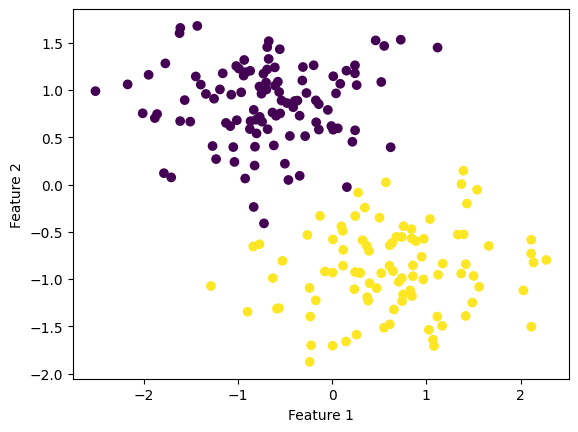

In [ ]:
# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

---
---
----
----
----
----
---

## **Single Layer Perceptron Using `sklearn` and `numpy`:**

`(Binary Classification on a Linearly Separable Dataset):`

Here, we are going to the process of `building`, `training`, and `evaluating` a `Perceptron model` for binary classification using a synthetic, linearly separable dataset.

**We will follow these steps:**

1. Import Libraries

2. Generate Dataset using `make_blobs()`

3. Train-Test Split with `train_test_split()`

4. Scale Features using `StandardScaler()`

5. Initialize Perceptron with appropriate input size

6. Train the Model with `fit()` over 100 epochs

7. Predict on test data and evaluate accuracy by comparing predictions with actual labels

8. Visualize Results using a scatter plot

In [ ]:
# First, define the model:

# Import the necessary library
import numpy as np

# Build the Perceptron Model:
class Perceptron:

    def __init__(self, num_inputs, learning_rate=0.01):
        # Initialize the weight and learning rate
        self.weights = np.random.rand(num_inputs + 1)
        self.learning_rate = learning_rate

    # Define the first linear layer
    def linear(self, inputs):
        Z = inputs @ self.weights[1:].T + + self.weights[0]
        return Z

    # Define the Heaviside Step function.
    def Heaviside_step_fn(self, z):
        if z>=0:
            return 1
        else:
            return 0

    # Define the Prediction
    def predict(self, inputs):
        Z = self.linear(inputs)
        try:
            pred = []
            for z in Z:
                pred.append(self.Heaviside_step_fn(z))
        except:
            return self.Heaviside_step_fn(Z)
        return pred

    # Define the Loss function
    def loss(self, prediction, target):
        loss = (prediction-target)
        return loss

    #Define training
    def train(self, inputs, target):
        prediction = self.predict(inputs)
        error = self.loss(prediction, target)
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0]  += self.learning_rate * error

    # Fit the model
    def fit(self, X, y, num_epochs):
        for epoch in range(num_epochs):
            for inputs, target in zip(X, y):
                self.train(inputs, target)

In [ ]:
# Import the necessary library
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=3,
                  random_state=23)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

In [ ]:
# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Set the random seed legacy
np.random.seed(23)

# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])

# Train the Perceptron on the training data
perceptron.fit(X_train, y_train, num_epochs=100)

# Prediction
pred = perceptron.predict(X_test)

In [ ]:
# Test the accuracy of the trained Perceptron on the testing data
accuracy = np.mean(pred != y_test)
print("Accuracy:", accuracy)

Accuracy: 0.975


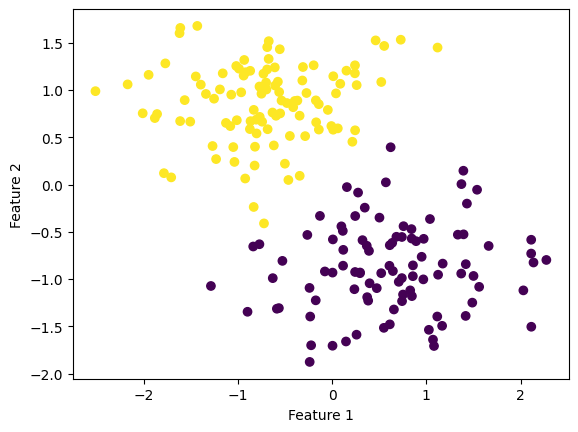

In [ ]:
# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## **Limitations of Perceptron:**

The `Perceptron` was a significant breakthrough in the development of neural networks, proving that simple networks could learn to classify patterns. However, the `Perceptron model` has certain limitations that can make it unsuitable for some tasks:

1. Limited to `linearly separable` problems

2. Struggles with `convergence` when handling non-separable data

3. Requires `labeled data` for training

4. Sensitive to `input scaling`

5. `Lacks hidden layers` for complex decision-making

To overcome these limitations, more advanced neural network architectures, such as `Multilayer Perceptrons` $(MLPs)$, `Convolutional Neural Networks` $(CNNs)$, `Recurrent Neural Networks` ($RNNs)$ and, `Transformers` have been developed. These models can learn more complex patterns and are widely used in modern machine learning and deep learning applications.